In [4]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec
import math
import matplotlib.image as mpimg
import matplotlib.patches as patches



## Figure 2 

In [5]:
d = [3, 4, 5, 6, 8, 10, 12, 15, 20, 25, 30, 35, 40, 50]
# d = list(range(1, 15))
b = list(range(0, 256))  # All integers from 0 to 255
a = list(range(361))  # All integers from 0 to 360 
# empty list to store result of x
results = []

# loop over each combination of d, b, and a
for di in d:
    for bi in b:
        # find the value of x
        x = (math.sqrt((65536) / (bi + 1)) - 16) * (1/ di) 
        
        # Append the result to the list
        results.append([di, bi, x])

# Create a DataFrame to store the results
df = pd.DataFrame(results, columns=['d', 'b', 'x'])

# Convert 'd' column to categorical data type
df['d'] = df['d'].astype('str')


/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_43810/2627956462.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='x', y='d', palette=palette, cut=0, inner="quartile", ax=ax)
/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_43810/2627956462.py:39: UserWarning: 
The palette list has fewer values (1) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df, x='x', y='d', palette=palette, cut=0, inner="quartile", ax=ax)


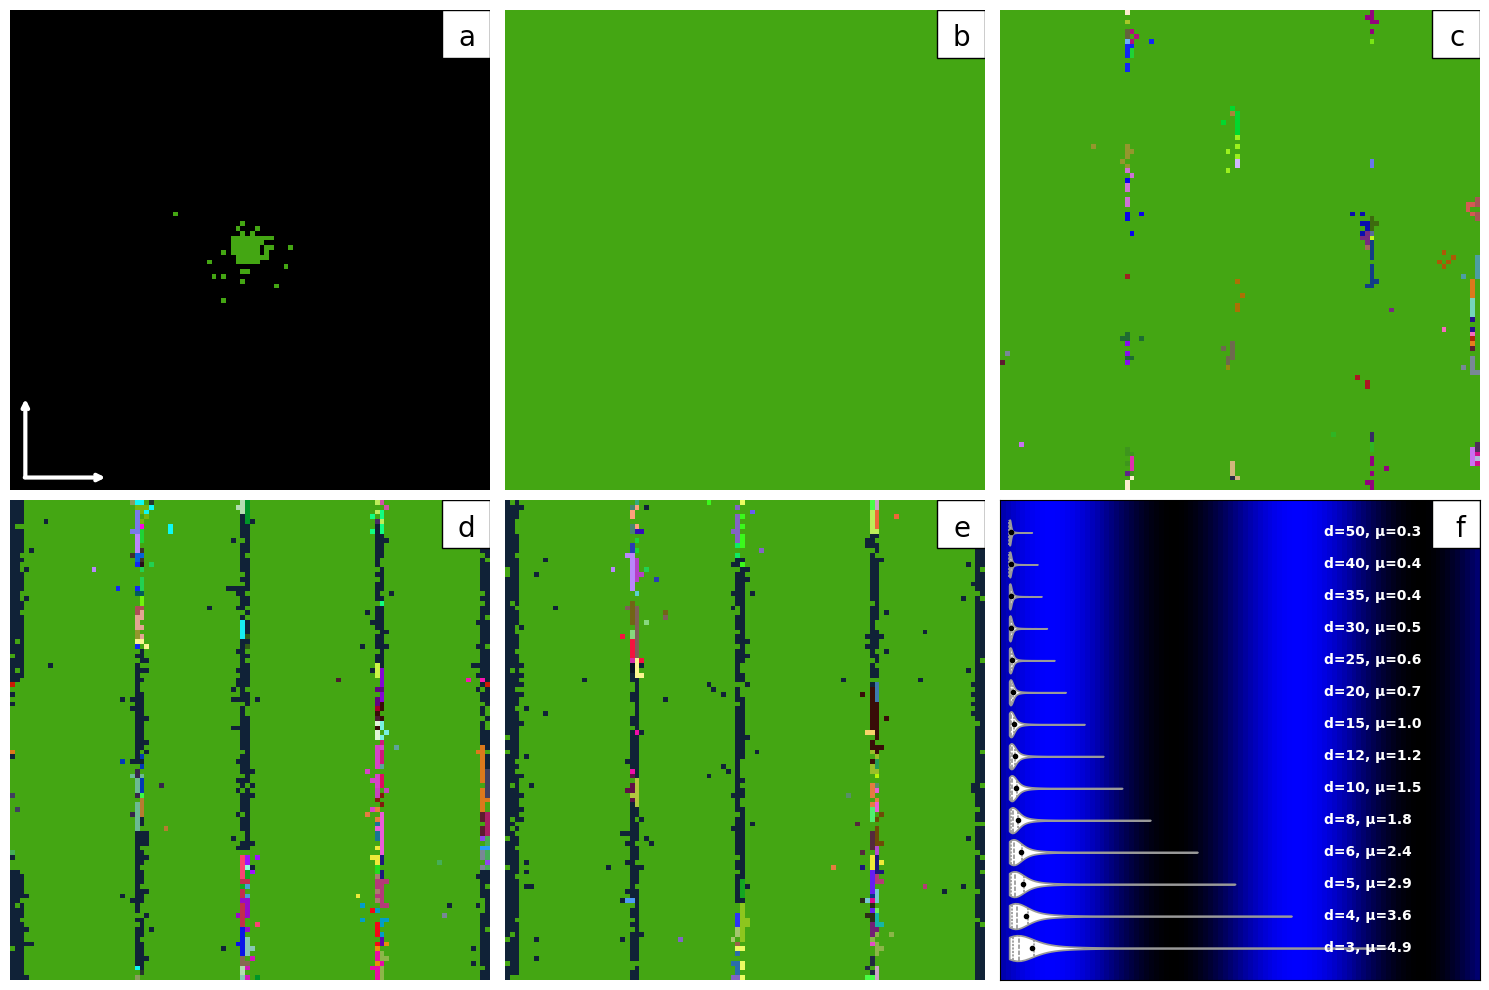

In [9]:
palette = ['white']

disps = df['d'].unique()  # Get unique categories in sorted order

# Paths to the first 5 images
image_paths = [
    '/Users/gb4818/Desktop/REvoSim_output/species/REvoSim_species_it_0000099.png',
    '/Users/gb4818/Desktop/REvoSim_output/species/REvoSim_species_it_0000999.png',
    '/Users/gb4818/Desktop/REvoSim_output/species/REvoSim_species_it_0009999.png',
    '/Users/gb4818/Desktop/REvoSim_output/species/REvoSim_species_it_0049999.png',
    '/Users/gb4818/Desktop/REvoSim_output/species/REvoSim_species_it_0099999.png'
]
# Path to the environment image
last_image_path = mpimg.imread('/Users/gb4818/Desktop/REvoSim_output/w50_0RG/w50_0RG.png')

# Create the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot the images in the first five plots
for i in range(5):
    img = mpimg.imread(image_paths[i])
    ax = axes[i//3, i%3]
    ax.imshow(img)
    ax.axis('off')
    # Add letter and box around it
    ax.text(0.97, 0.97, chr(97 + i), transform=ax.transAxes, fontsize=20,  va='top', ha='right')
    rect = patches.Rectangle((0.9, 0.9), 0.1, 0.1, linewidth=1, edgecolor='black', facecolor='white', transform=ax.transAxes)
    ax.add_patch(rect)

# Add arrows to the first plot
ax = axes[0, 0]
ax.annotate('', xy=(20, 97), xytext=(2, 97), arrowprops=dict( lw=3, facecolor='white', edgecolor='white', arrowstyle='->'), zorder=3)
ax.annotate('', xy=(2.70, 80), xytext=(2.70, 97.5), arrowprops=dict(lw =3, facecolor='white', edgecolor='white', arrowstyle='->'), zorder=3)


# Plot the violin plot in the sixth plot
ax = axes[1, 2]
palette = ['white']
sns.violinplot(data=df, x='x', y='d', palette=palette, cut=0, inner="quartile", ax=ax)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_xlim(-2, 100)
ax.imshow(last_image_path, extent=[-5, 100, -1, (len(df['d'].unique()))], aspect='auto')
# Add letter and box around it
ax.text(0.97, 0.97, 'f', transform=ax.transAxes, fontsize=20,  va='top', ha='right')
rect = patches.Rectangle((0.9, 0.9), 0.1, 0.1, linewidth=1, edgecolor='black', facecolor='white', transform=ax.transAxes)
ax.add_patch(rect)

for i, disp in enumerate(disps):
    # Calculate median and mean
    median_val = df[df['d'] == disp]['x'].median()
    mean_val = df[df['d'] == disp]['x'].mean()
    ax.plot(mean_val, i, 'o', color = "black", markersize=3, zorder=3)  # Plot mean point

    # Annotate the mean value using the μ symbol
    ax.text(mean_val + (67-mean_val), i, f'd={disp}, μ={mean_val:.1f}', verticalalignment='center', horizontalalignment='left', fontsize=10, color='White',  weight='bold')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Figure 3 

In [2]:
combined_df = pd.read_csv('/Users/gb4818/OneDrive - Imperial College London/Rev-res-in/dispersion/csv/w50_15dp_iterations_species_richness.csv', index_col=0)      

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_43810/1514493205.py:22: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=data, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


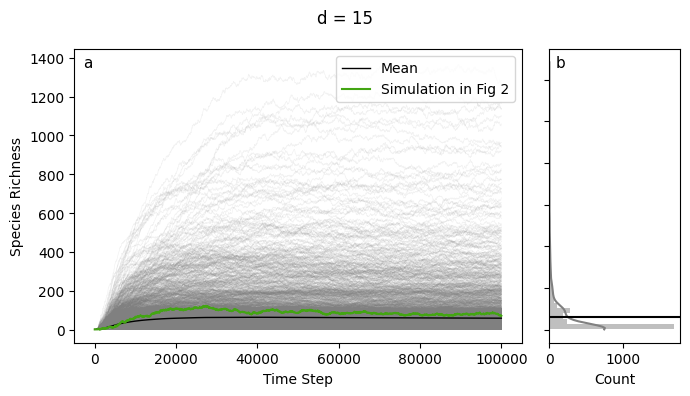

In [3]:
# Group the combined DataFrame by 'Environment'
grouped_df = combined_df.groupby('dp')

# Define the number of unique environments for coloring
num_environments = len(grouped_df)
colors = sns.color_palette("viridis", num_environments)
palette = ['gray']

#filder one dataframe ro get only one simylation and highlight that
one_sim = combined_df[combined_df['Simulation']== 'REvoSim_log_HL.txt']

# Plot for each environment
for i, (environment, data) in enumerate(grouped_df):
    fig = plt.figure(figsize=(7, 4))
    fig.suptitle(f"d = {environment}", fontsize=12)
    plt.subplots_adjust(top=0.3)
    #greting a grid for the two plots
    gs = gridspec.GridSpec(3, 4)
    ax_main = plt.subplot(gs[:, :3])  # Adjusted the column index
    ax_yDist = ax_yDist = plt.subplot(gs[:, 3])
    
    sns.lineplot(data=data, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)
    # Calculate mean and median for each iteration
    mean_values = data.groupby('Iteration_Number')['Species_Count'].mean()
    #meadian_value = data.groupby('Iteration_Number')['Species_Count'].median()
    # Plot mean line
    ax_main.plot(mean_values.index, mean_values.values,  color='Black', linewidth = 1 , label='Mean')
    #ax_main.plot(meadian_value.index, meadian_value.values,  color=colors[i], linestyle='-', label='Median')
    # Add an individual simulation highlighted
    sns.lineplot(data=one_sim, x='Iteration_Number', y='Species_Count', ax = ax_main,  legend=False, linewidth = 1.5, label= 'Simulation in Fig 2', color='#43A513')


    # Plot distribution at equilibrium
    data_hist = data[data['Iteration_Number'] == 99999]
    sns.histplot(data = data_hist, y = 'Species_Count', bins=50, ax=ax_yDist, color='gray', kde=True, edgecolor = 'none' ) 
    # Calculate and plot mean line on histogram plot
    mean_hist = data_hist['Species_Count'].mean()
    ax_yDist.axhline(y=mean_hist, color='black', linewidth=1.5, label='Mean')
    
    
    #annotate a and b on the two panels
    ax_main.annotate('a', xy=(0.02, 0.98), xycoords='axes fraction', fontsize=11,
                horizontalalignment='left', verticalalignment='top')
    ax_yDist.annotate('b', xy=(0.05, 0.98), xycoords='axes fraction', fontsize=11,
                horizontalalignment='left', verticalalignment='top')
    # Set title and axis
    #ax_main.set_title(f"d = {environment}")
    ax_main.set_xlabel("Time Step")
    ax_main.set_ylabel("Species Richness")

    # Remove labels of numbers on the y-axis ans set labels
    ax_yDist.set_yticklabels([])
    ax_yDist.set_xlabel("Count")
    ax_yDist.set(ylabel=None)
    
    # Reduce the space between subplots
    plt.subplots_adjust(wspace=0.0)  
    
    # Show legend
    ax_main.legend(loc='upper right')
    plt.tight_layout()
    plt.show()